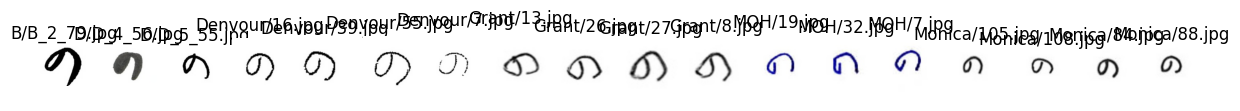

In [16]:
# C/C_1_1.jpg
# D/D_5_42.jpg
# D/D_4_8.jpg
# D/D_3_21.jpg
# D/D_5_5.jpg
# B/B_5_3.jpg
# B/B_3_40.jpg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
image_folder_path = '../../pilot data/data/'
common_character_group = ['は', 'か', 'へ', 'で', 'す', 'あ', 'お',
              'の', 'に', 'を', 'る', 'く', 'し', 'な', 'よ', 'ス', 'ル', 
              '日', '事', '人', '本', '大']
#,'上', '生','文','明','情', '国', '子', '用', '战', '手', '小','年' #No data
character = 'の'
source_path = 'cluster/' + character +".csv"
df = pd.read_csv(source_path)
plt.figure(figsize=(15, 5))
for i in range(len(df)):
    image_path = os.path.join(image_folder_path, df.iloc[i]['Image_name'])
    image = plt.imread(image_path)
    
    # Create a subplot for each image
    ax = plt.subplot(1, len(df), i + 1)  # (1, number of images, index of current image)
    ax.imshow(image)
    ax.set_title(df.iloc[i]['Image_name'])
    ax.axis('off')  # Turn off axis labels and ticks

plt.show()

In [17]:
# Feature extraction part
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import cv2
import os
def label_image(img,cornerlist):
    """
    Label the correspond point in the image 
    Parameters:
    - img:  np.ndarray image read by plt
    - cornerlist : A list which store coordinate to highlight. 
    
    Returns: 
    - The labeled image. 
    """
    # iterate all the point in the coordinate list. 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for (x,y) in cornerlist:
        #x is row, y is column
        cv2.circle(img,(y,x),1, (0, 255, 0), -1)
    # return the image. 
    return img
def non_max_suppression(cornresult: np.ndarray, threshold: float = 0.01, K_size: int = 3) -> List[Tuple[int, int]]:
    """
    Utilize the result of Harris Corner Detection to fitrate those 
    local maxima (corners) and returned.

    Parameters:
    - cornresult: 2D array obtained from Harris_Corner()
    - threshold: Hyperparameter to determine a local maximum is considered a corner.
    - K_size: Size of the kernel used for non-maximum suppression.

    Returns:
    - List of tuples (row, column) indices of detected corners.
    """
    m, n = cornresult.shape
    supresult = []
    # Adding boundary to origin image so that can apply kernel on them
    k_half = K_size // 2
    padded_result = np.pad(cornresult, pad_width=k_half, mode='constant', constant_values=0)
    threshold = threshold * np.max(cornresult)
    # Iterate over the original image dimensions
    for r in range(m):
        for c in range(n):
            center_value = cornresult[r, c]
            if center_value == 0:
                continue
            # Extract 3*3 kernel
            local_patch = padded_result[r + k_half - k_half : r + k_half + k_half + 1,
                                        c + k_half - k_half : c + k_half + k_half + 1]
            # Ignore the corners of the padded_result, which correspond to the padding area
            if (r - k_half == 0 or r + k_half == m + k_half - 1 
                or c - k_half == 0 or c + k_half == n + k_half - 1):
                continue
            if center_value == np.max(local_patch) and center_value > threshold:
                supresult.append((r, c))
    
    return supresult

def pad_images_to_size(img, target_size=(80, 80)):
    
    if img is not None:
        h, w = img.shape[:2]
        if h > target_size[1] or w > target_size[0]: # adjust size in case image too big or too small
            img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        elif h < target_size[1] or w < target_size[0]:
            top = (target_size[1] - h) // 2
            bottom = target_size[1] - h - top
            left = (target_size[0] - w) // 2
            right = target_size[0] - w - left
            img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    return img
def load_local_image(file_path):
    """ load local images """
    if os.path.exists(file_path):
        image = cv2.imread(file_path)
        return image
    else:
        print(f"{file_path} doesnt exist")
        return None

import cv2
import matplotlib.pyplot as plt

def preprocess_image(image, margin=10, fixed_size=(200, 200)):
    if image is None:
        print("Nothing to preprocess")
        return None

    # convert it into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # threshold
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    return binary

def extract_features(binary_image):
    features = {
        'white_pixels_ratio': np.sum(binary_image > 128) / binary_image.size
    }
    return features


#extract features with images set
def process_image_set(image_set, dir_path):
    """ deal with a set of image and feature extraction """
    features_list = []
    for file_name in image_set:
        file_path = os.path.join(dir_path, file_name)
        image = cv2.imread(file_path)
        if image is not None:
            preprocessed_image = preprocess_image(image)
            if preprocessed_image is not None:
                features = extract_features(preprocessed_image)
                if features is not None:
                    features_list.append(features)
            else:
                print(f"preprocessing {file_name} failed")
        else:
            print(f"loading {file_name} failed")
    return features_list
    
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import cv2
import os
# source_path = 'cluster/あ.csv'
df = pd.read_csv(source_path)
sum_m = 0
sum_n = 0
for i in range(len(df)):
    image_path = os.path.join(image_folder_path, df.iloc[i]['Image_name'])
    Img = cv2.imread(image_path)
    m,n = Img.shape[0],Img.shape[1]
    sum_m += m
    sum_n += n
sum_m = sum_m // len(df)
sum_n = sum_n // len(df)

feature_dots_len =[]
feature_dots = []
plt.figure(figsize=(15, 5))
for i in range(len(df)):
    image_path = os.path.join(image_folder_path, df.iloc[i]['Image_name'])
    Img = cv2.imread(image_path)
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
    Img = pad_images_to_size(Img,(round(sum_m),round(0.7*sum_n)))
    if Img.ndim == 3:
        gray_Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
    else:
        gray_Img = Img  # If Img is already in grayscale

    #in-build function
    in_build_harris  = cv2.cornerHarris(gray_Img, 2, 3, 0.04)
    in_build_corner = non_max_suppression(in_build_harris)
    feature_dots.append(in_build_corner)
    feature_dots_len.append(len(in_build_corner))
    # convert image back to rgb form to display
    rgb_Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

    img_with_corners = label_image(rgb_Img,in_build_corner)
#     plt.figure(figsize=(15, 5))

#     ax = plt.subplot(1,len(df),  i + 1)  # (number of rows, number of cols, index)
#     ax.imshow(img_with_corners)
#     ax.set_title('Harris Corner: ' + df.iloc[i]['Image_name'])
#     ax.axis('off')  # Hide axes

# plt.tight_layout()  # Adjust layout to fit all elements
# plt.show()
#extract features from image
feature_list = []
image_folder_path = '../../pilot data/data/'

# source_path = 'cluster/あ.csv'
df = pd.read_csv(source_path)
for i in range(len(df)):
    image_path = os.path.join(image_folder_path, df.iloc[i]['Image_name'])
    image = load_local_image(image_path)
    if image is not None:
        preprocessed_image = preprocess_image(image)
        if preprocessed_image is not None:
            features = extract_features(preprocessed_image)
            if features is not None:
                feature_list.append((df.iloc[i]['Image_name'],features))
def compute_corner_density(corners, image_width, image_height):
    num_corners = len(corners)
    area = image_width * image_height
    density = num_corners / area
    return density

def compute_corner_stats(corners):
    x_coords = [coord[0] for coord in corners]
    y_coords = [coord[1] for coord in corners]
    
    stats = {
        'mean_x': np.mean(x_coords),
        'mean_y': np.mean(y_coords),
        'var_x': np.var(x_coords),
        'var_y': np.var(y_coords)
    }
    return stats

def compute_bounding_box_size(corners):
    x_coords = [coord[0] for coord in corners]
    y_coords = [coord[1] for coord in corners]
    
    min_x = min(x_coords)
    max_x = max(x_coords)
    min_y = min(y_coords)
    max_y = max(y_coords)
    
    width = max_x - min_x
    height = max_y - min_y
    return width, height

for index, (img,feature) in enumerate(feature_list):
    corners = feature_dots[index]
    dots_len = feature_dots_len[index]
    density = compute_corner_density(corners, sum_m,round(sum_n*0.7))
    stats = compute_corner_stats(corners)
    s_width,s_height = compute_bounding_box_size(corners)
    feature['corner_num'] = dots_len
    feature['corner_density'] = density
    for k,v in stats.items():
        feature[k] = v
    feature['smallest_width'] = s_width
    feature['smallest_height'] = s_height


print(str(feature_list[0][:]))


('B/B_2_79.jpg', {'white_pixels_ratio': 0.2085776511978556, 'corner_num': 19, 'corner_density': 0.0015029267520961873, 'mean_x': 49.89473684210526, 'mean_y': 57.05263157894737, 'var_x': 581.1468144044321, 'var_y': 781.8393351800555, 'smallest_width': 78, 'smallest_height': 82})


<Figure size 1500x500 with 0 Axes>

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
import os
from sklearn.decomposition import PCA
data = []
for file_name, features in feature_list:
    entry = [
        features['white_pixels_ratio'],
        features['corner_num'],
        features['corner_density'],
        features['mean_x'],
        features['mean_y'],
        features['var_x'],
        features['var_y'],
        features['smallest_width'],
        features['smallest_height']
    ]
    data.append(entry)

data = np.array(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



In [20]:
from sklearn.decomposition import PCA # DBSCAN
from sklearn.cluster import DBSCAN

hyper_data = pd.read_excel("DBSCAN.xlsx")

data_row = hyper_data[hyper_data['character'] == character]
ep = int(data_row['eps'].iloc[0])
min_sample = int(data_row['min_sample'].iloc[0])
PCA_n = int(data_row['PCA'].iloc[0])
pca = PCA(n_components= PCA_n) #higher, stricter

data_reduced = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps = ep, min_samples=min_sample) #eps lower, stricter
dbscan.fit(data_reduced)

clusters = dbscan.labels_

print("Cluster assignments after PCA:", clusters)

Cluster assignments after PCA: [-1 -1 -1  0 -1 -1  0 -1  1  1  1  2  2  3  3 -1  3  3]


Cluster 0: ['Denvour/16.jpg', 'Denvour/7.jpg']


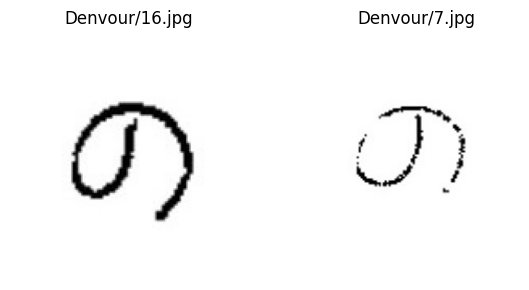

Cluster 1: ['Grant/26.jpg', 'Grant/27.jpg', 'Grant/8.jpg']


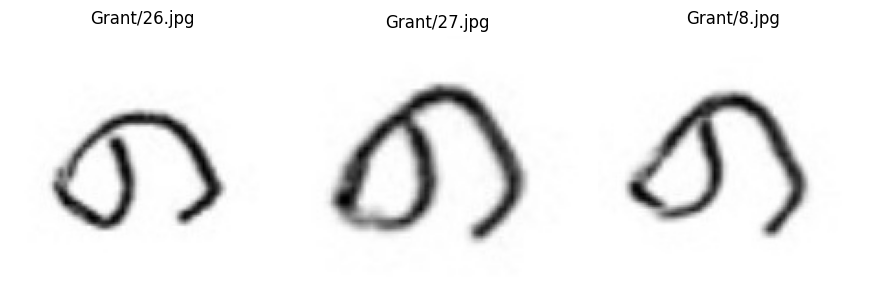

Cluster 2: ['MOH/19.jpg', 'MOH/32.jpg']


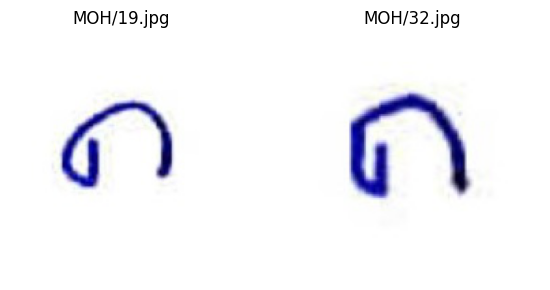

Cluster 3: ['MOH/7.jpg', 'Monica/105.jpg', 'Monica/84.jpg', 'Monica/88.jpg']


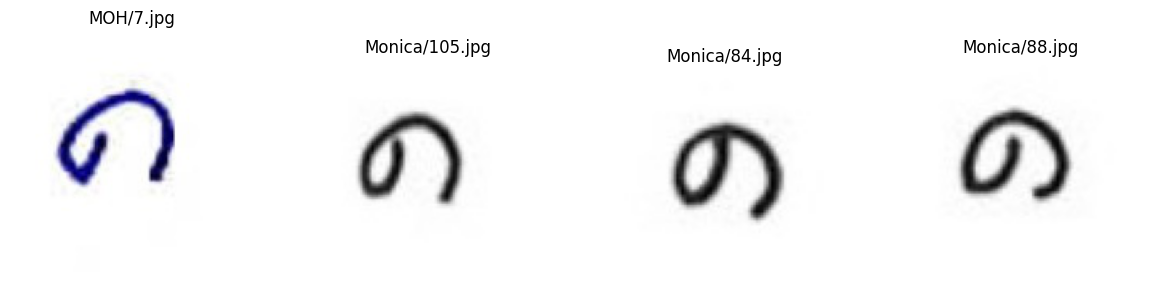

After classifying with DBSCAN, the following images are likely to have the same author:

'Denvour/16.jpg', and 'Denvour/7.jpg' have the same author.

'Grant/26.jpg', 'Grant/27.jpg', and 'Grant/8.jpg' have the same author.

'MOH/19.jpg', and 'MOH/32.jpg' have the same author.

'MOH/7.jpg', 'Monica/105.jpg', 'Monica/84.jpg', and 'Monica/88.jpg' have the same author.


In [21]:
from collections import defaultdict

cluster_dict = defaultdict(list)

# Populate the cluster dictionary based on DBSCAN labels
for index, cluster_label in enumerate(dbscan.labels_):
    image_name = feature_list[index][0]
    cluster_dict[cluster_label].append(image_name)

# Display the clustering results
cluster_images = []
for cluster, images in cluster_dict.items():
    if cluster != -1:  # -1 represents noise in DBSCAN, you might want to ignore it
        print(f"Cluster {cluster}: {images}")
        imageset = []
        plt.figure(figsize=(3 * len(images), 3))
        for index, img_name in enumerate(images):
            
            image_path = os.path.join(image_folder_path, img_name)
            image = plt.imread(image_path)
            ax = plt.subplot(1, len(images), index + 1)
            ax.imshow(image)
            ax.set_title(img_name)
            ax.axis('off')
            imageset.append(img_name)
        plt.tight_layout()
        plt.show()
        cluster_images.append(imageset)

# Summarize the clustering results
print(f"After classifying with DBSCAN, the following images are likely to have the same author:")
if len(cluster_images) >= 1:
    for images in cluster_images:
        if len(images) > 1:
            images_formatted = "', '".join(images[:-1])
            print()
            summary_statement = f"'{images_formatted}', and '{images[-1]}' have the same author."
            print(summary_statement)